In [18]:
def countS(n,cache,weight_unpaired=1):
    if n not in cache:
        if n == 0:
            val = 1
        else:
            val = weight_unpaired*countS(n-1,cache,weight_unpaired)
            if n>1:
                for i in range(n-1):
                    val += countS(i,cache,weight_unpaired)*countS(n-2-i,cache,weight_unpaired)
        cache[n] = val
    return cache[n]

for n in range(110):
    cache = {}
    print(n,countS(n,cache))

0 1
1 1
2 2
3 4
4 9
5 21
6 51
7 127
8 323
9 835
10 2188
11 5798
12 15511
13 41835
14 113634
15 310572
16 853467
17 2356779
18 6536382
19 18199284
20 50852019
21 142547559
22 400763223
23 1129760415
24 3192727797
25 9043402501
26 25669818476
27 73007772802
28 208023278209
29 593742784829
30 1697385471211
31 4859761676391
32 13933569346707
33 40002464776083
34 114988706524270
35 330931069469828
36 953467954114363
37 2750016719520991
38 7939655757745265
39 22944749046030949
40 66368199913921497
41 192137918101841817
42 556704809728838604
43 1614282136160911722
44 4684478925507420069
45 13603677110519480289
46 39532221379621112004
47 114956499435014161638
48 334496473194459009429
49 973899740488107474693
50 2837208756709314025578
51 8270140811590103129028
52 24119587499879368045581
53 70380687801729972163737
54 205473381836953330090977
55 600161698382141668958313
56 1753816895177229449263803
57 5127391665653918424581931
58 14996791899280244858336604
59 43881711243248048262611670
60 1284535

In [33]:
import random

def generateS(n,cache,weight_unpaired):
    if n == 0:
        return ""
    else:
        r = random.random()*countS(n,cache,weight_unpaired)
        r -= weight_unpaired*countS(n-1,cache,weight_unpaired)
        if r<0:
            return "."+generateS(n-1,cache,weight_unpaired)
        if n>1:
            for i in range(n-1):
                r -= countS(i,cache,weight_unpaired)*countS(n-2-i,cache,weight_unpaired)
                if r<0:
                    return "("+generateS(i,cache,weight_unpaired)+")"+generateS(n-2-i,cache,weight_unpaired)
    return None
NB_SAMPLES = 2100000
n = 5
cache={}
stats = {}
wu = 
for i in range(NB_SAMPLES):
    s = generateS(n,cache,wu)
    stats[s] = stats.get(s,0) + 1
for s in stats:
    print(s, stats[s])

(()). 167141
().() 166691
()(). 166961
(...) 42046
((.)) 168009
.()() 166934
.(.). 41912
(.()) 167762
..(.) 41722
(().) 166722
.(()) 167521
(.).. 41884
..... 10424
()... 41793
.().. 41565
()(.) 167715
(.)() 166299
(..). 41685
..(). 41931
...() 41708
.(..) 41575


<Axes: xlabel='num unpaired', ylabel='Count'>

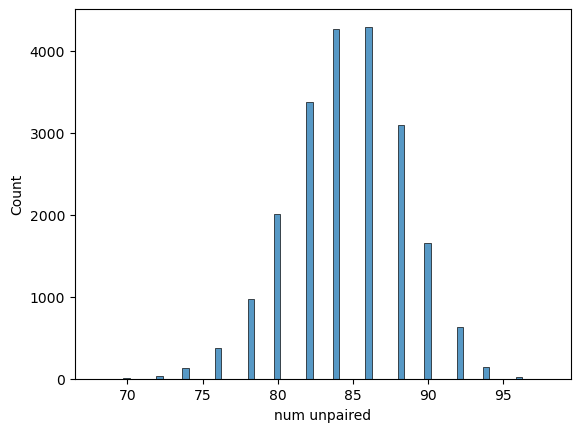

In [29]:
import pandas as pd
import seaborn as sn

NB_SAMPLES = 21000
n = 100
cache={}
stats = {}
wu = 10
samples = [generate(n,cache,wu) for i in range(NB_SAMPLES)]
df = pd.DataFrame([s.count(".") for s in samples],columns=["num unpaired"])
sn.histplot(df,x="num unpaired")

<Axes: xlabel='num unpaired', ylabel='Count'>

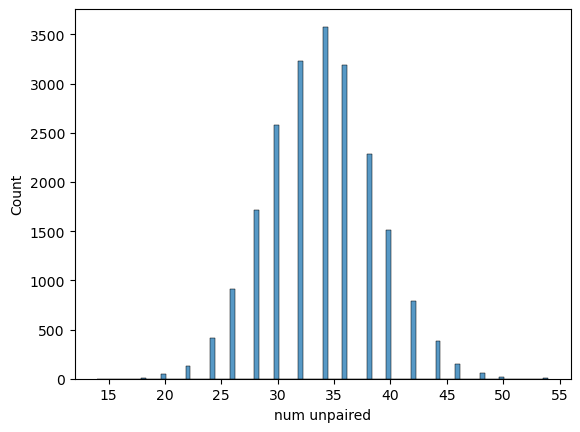

In [30]:
cache={}
stats = {}
wu = 1
samples = [generate(n,cache,wu) for i in range(NB_SAMPLES)]
df = pd.DataFrame([s.count(".") for s in samples],columns=["num unpaired"])
sn.histplot(df,x="num unpaired")

In [31]:
[generate(n,cache,wu) for i in range(10)]

['()((.())(...(..(..)(())(((.(...(((()))..)()())()).)(..()(.(.(..((.)()....)(.)).)(((.)))).)()..()))))',
 '(.()()(.......(((.)(...().(()(((.().(.).().((.(.).))....)))()().)())(())(.)().(.(.))).)())..()(.)())',
 '(.()(((.(...().()))().)(.(.)..((.))))...(.((..)(..)(..)).()()).(.))()(()(..(.)().(..).(.)())())(...)',
 '.((..(((()(..(().(.)(().(().)).().))..(..())(.(()))..())))).)(..(.).)()....(.).(.((.((.))).)(().)..)',
 '.(()())(.)(()((.((.(..(.))..)()(((...(.()))))((()().))(..))..))..(()....((.)()(((()).)()))(..))...).',
 '...((()(..))().().()(.()(.(.((.).()...()..).((.(()).()(()((.())))(((..)).(..)).)(.()..)))).))().(.).',
 '(...(((((.()).(...(.(().(...()..))..(.).).))(.(()..))..()(..().()((....))(.)).)))((.(.().)).)()..)..',
 '(((().(..(.(.().)(.().((..(...()(())())..))()(.)))()..(.).()).)..().(...)(...(..)(.(()).).))())...()',
 '(..().((((.)((..).)()))()).(.)(.(.(.).(....).().(.))(((()..))..(()(.)((.)(.)))))..).(())()..(())..()',
 '.(.)(()().)().(((..))(()..(..((.)(.()(((()(.(.())(())

In [79]:
def countS(n,cache,weight_unpaired,weight_stack):
    if ("S",n) not in cache:
        if n == 0:
            val = 1
        else:
            val = weight_unpaired*countS(n-1,cache,weight_unpaired,weight_stack)
            if n>1:
                val += countS(n-2,cache,weight_unpaired,weight_stack)
            if n>2:
                for i in range(1,n-1):
                    val += countT(i,cache,weight_unpaired,weight_stack)*countS(n-2-i,cache,weight_unpaired,weight_stack)
        cache[("S",n)] = val
    return cache[("S",n)]
    
def generateS(n,cache,weight_unpaired,weight_stack):
    if n == 0:
        return ""
    else:
        r = random.random() * countS(n,cache,weight_unpaired,weight_stack)
        r -= weight_unpaired * countS(n-1,cache,weight_unpaired,weight_stack)
        if r<0:
            return "." + generateS(n-1,cache,weight_unpaired,weight_stack)
        if n>1:
            r -= countS(n-2,cache,weight_unpaired,weight_stack)
            if r<0:
                return "()" + generateS(n-2,cache,weight_unpaired,weight_stack)
        if n>2:
            for i in range(1,n-1):
                r -= countT(i,cache,weight_unpaired,weight_stack)*countS(n-2-i,cache,weight_unpaired,weight_stack)
                if r<0:
                    return "("+generateT(i,cache,weight_unpaired,weight_stack)+")"+generateS(n-2-i,cache,weight_unpaired,weight_stack)
    return None

def countT(n,cache,weight_unpaired,weight_stack):
    if ("T",n) not in cache:
        if n == 0:
            val = 0
        else:
            val = weight_unpaired*countS(n-1,cache,weight_unpaired,weight_stack)
            if n==2:
                val += weight_stack
            if n>2:
                val += countT(n-2,cache,weight_unpaired,weight_stack)
            if n>2:
                val += weight_stack*countT(n-2,cache,weight_unpaired,weight_stack)
            if n>3:
                for i in range(1,n-2):
                    val += countT(i,cache,weight_unpaired,weight_stack)*countT(n-2-i,cache,weight_unpaired,weight_stack)
        cache[("T",n)] = val
    return cache[("T",n)]
    
def generateT(n,cache,weight_unpaired,weight_stack):
    if n == 0:
        return "#"
    else:
        r = random.random()*countT(n,cache,weight_unpaired,weight_stack)
        r -= weight_unpaired*countS(n-1,cache,weight_unpaired,weight_stack)
        if r<0:
            return "."+generateS(n-1,cache,weight_unpaired,weight_stack)
        if n==2:
            r -= weight_stack
            if r<0:
                return "()"
        if n>2:
            r -= countT(n-2,cache,weight_unpaired,weight_stack)
            if r<0:
                return "()"+generateT(n-2,cache,weight_unpaired,weight_stack)
        if n>2:
            r -= weight_stack*countT(n-2,cache,weight_unpaired,weight_stack)
            if r<0:
                return "("+generateT(n-2,cache,weight_unpaired,weight_stack)+")"
        if n>3:
            for i in range(1,n-2):
                r -= countT(i,cache,weight_unpaired,weight_stack)*countT(n-2-i,cache,weight_unpaired,weight_stack)
                if r<0:
                    return "("+generateT(i,cache,weight_unpaired,weight_stack)+")"+generateT(n-2-i,cache,weight_unpaired,weight_stack)
    return None

In [84]:
NB_SAMPLES = 32000
n = 5
cache={}
stats = {}
wu = .5
ws = 100
for i in range(NB_SAMPLES):
    s = generateS(n,cache,wu,ws)
    stats[s] = stats.get(s,0) + 1
for s in stats:
    print(s, stats[s])

.(()) 10407
((.)) 10200
(()). 10486
(.).. 24
()(.) 94
(.()) 103
(.)() 98
()(). 91
(..). 25
().() 94
...() 20
(().) 110
()... 16
.()() 88
(...) 26
..(). 28
..(.) 22
.(..) 18
.(.). 20
.().. 21
..... 9


<Axes: xlabel='num stacks', ylabel='num unpaired'>

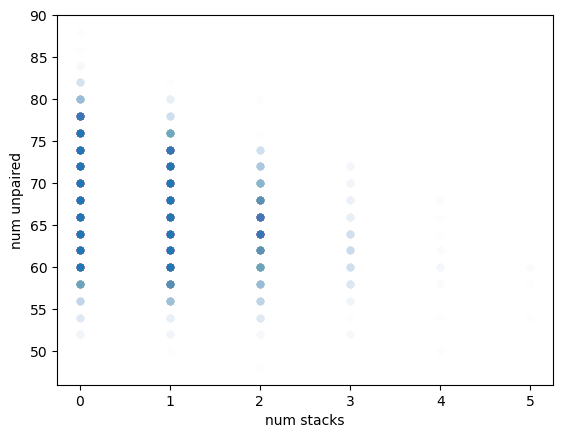

In [116]:
def parseSS(s):
    res = []
    p = []
    for i,c in enumerate(s):
        if c == "(":
            p.append(i)
        elif c ==")":
            j = p.pop()
            res.append((j,i))
    return res

def numStacks(s):
    res = 0
    bps = set(parseSS(s))
    for (i,j) in bps:
        if (i+1,j-1) in bps:
            res += 1
    return res
            

cache={}
stats = {}
wu = 4
ws = 1
n = 100
samples = [generateS(n,cache,wu,ws) for i in range(10000)]
df = pd.DataFrame([(s.count("."),numStacks(s)) for s in samples],columns=["num unpaired","num stacks"])
sn.scatterplot(df,x="num stacks",y="num unpaired",alpha=.01)


In [110]:
[generateS(n,cache,wu,ws) for i in range(100)]

['(((((((()))))))((((((((((((((((((()(((((()....)))(((())))))))))))))))))(((((((((()))))))))))))))))..',
 '(((((((((.).)(((((((((((((((((((((((((()))))(..))))))))))).)))()))((((())))))))))))))))))((((())))).',
 '(((((((((((((((((((.))((((((()))))))))(((((((((((((((((((.)))))))))))))(((()))))))))))))))))))))))))',
 '(((((((((((((((((.))))))))(((()))))((((()((((..)))))))))))(((((((((((.)))(((...)))))(.)))))))())))))',
 '((((((())))())))..(((((((((((((((((....)))))))))))))).))).((((((((((((((((((((()))))))))))))))))))))',
 '((((((((((((((((())))))(((((((((((.)((((((())))))))))))))((()))))))(((()))(((((((.))))))))))))))))))',
 '.(((((((((((.((((((((((((((()(((((((((((((()))))))))))))))))))(((((()))))))))())))))))(.))))))))))).',
 '((((((((((((((((((((((.((((((((((((()(())))))))))))))))))))((())))))))(((((())))))()))((.)))))))))))',
 '(((((((((())))))))((((((((((((((.)))(()))))))))((((((((((.(((((...))))))))))(.))))()))))((()))))))..',
 '((((((((((((((((((((((((((((((()))))))))(((((..)))))(